# 14. Central limit theorem

In [156]:
# Import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set_style('dark')
sns.set_palette('rocket')

## 1. Net gain in roulette:
The histogram displays the net gain in 400 bets on red in roulette, simulated over 10,000 repetitions. Despite the non-bell-shaped underlying distribution, the histogram exhibits a rough bell shape, centered around -$20.

**Center**: The average net gain is approximately -$20, calculated by considering the probabilities of winning $1 or losing $1 on each bet.

**Spread**: The standard deviation of the distribution is approximately $20.

In [4]:
# Load the data
wheel = pd.read_csv('roulette_wheel.csv')
wheel.head()

,Pocket,Color
0,0,green
1,0,green
2,1,red
3,2,black
4,3,red


Recall that the bet on red pays even money, 1 to 1. 

The table red shows each pocket’s winnings on red.

In [27]:
wheel.rename(columns={'Color': 'colour', 'Pocket': 'pocket'}, inplace=True)
wheel['winnings'] = wheel['colour'].apply(lambda x: 1 if x == 'red' else -1)

wheel.head()

,pocket,colour,winnings
0,0,green,-1
1,0,green,-1
2,1,red,1
3,2,black,-1
4,3,red,1


Your net gain on one bet is one random draw from the Winnings: Red column. There is an 18/38 chance making $1, and a 20/38 chance of making -$1. This probability distribution is shown in the table and histogram:

,winnings,count
0,-1,20
1,1,18


<Axes: xlabel='winnings', ylabel='proportions'>

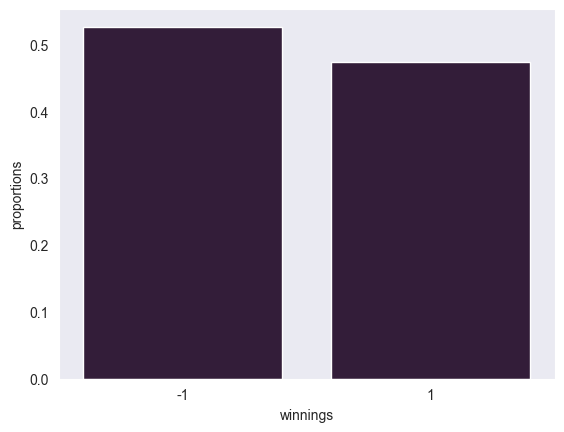

In [71]:
chance = wheel['winnings'].value_counts().reset_index()
display(chance)

chance['proportions'] = chance['count']/len(wheel)
sns.barplot(x='winnings', y='proportions', data=chance)

Now suppose you bet many times on red. Your net winnings will be the sum of many draws made at random with replacement from the distribution above.

It will take a bit of math to list all the possible values of your net winnings along with all of their chances. We won’t do that; instead, we will approximate the probability distribution by simulation.

In [133]:
wheel['sample'] = wheel['winnings'].sample(frac=1).reset_index(drop=True)
wheel.head()

,pocket,colour,winnings,sample
0,0,green,-1,-1
1,0,green,-1,1
2,1,red,1,1
3,2,black,-1,1
4,3,red,1,1


In [134]:
net_gain = wheel['sample'].sum()
net_gain


-2

,Simulation,Net gain
0,1,-36
1,2,36
2,3,-14
3,4,-4
4,5,-34


<Axes: xlabel='Net gain', ylabel='Count'>

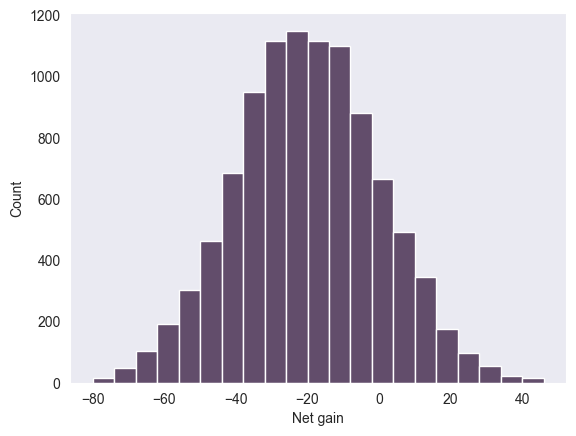

In [151]:
import numpy as np
import pandas as pd
import seaborn as sns

def wheel_simulation():
    data = []
    for i in range(1, rep + 1):
        # sample
        spins = wheel['winnings'].sample(n=num_bet, replace=True).reset_index(drop=True)
        # net gain
        net_gain = spins.sum()
        # append
        data.append({
            'Simulation': i,
            'Net gain': net_gain
        }) 
    datadf = pd.DataFrame(data)
    return datadf

num_bet = int(input("Enter the number of bets: "))
rep = int(input("Enter the number of simulations: "))
results = wheel_simulation()
display(results.head())

sns.histplot(results['Net gain'], bins=np.arange(-80, 50, 6))

That’s a roughly bell shaped histogram, even though the distribution we are drawing from is nowhere near bell shaped.

Center. The distribution is centered near -20 dollars, roughly. To see why, note that your winnings will be $1 on about 18/38 of the bets, and -$1 on the remaining 20/38. So your average winnings per dollar bet will be roughly -5.26 cents.

So in 400 bets you expect that your net gain will be about -$21.

For confirmation, we can compute the mean of the 10,000 simulated net gains:

In [154]:
results['Net gain'].mean()

-20.9634

In [153]:
results['Net gain'].std()

20.103787619940345

Since mean and SD = close -> NORMAL
-> CLT (large n)

## 2. United flights:

In [178]:
flights = pd.read_csv('united_summer2015.csv')
flights = flights.rename(columns={'Date': 'date',
                        'Flight Number': 'flight',
                        'Destination': 'des',
                        'Delay': 'delay'})
flights.head()

,date,flight,des,delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64


In [177]:
flights['delay'].mean()

16.658155515370705

**Task**: Create a sim function

Ask for random sample of n delays (used as an argument in sample(size = n))
Ask for number of m repetitions.

For consistent axes (ease of coparison) -> plots.xlim(5, 35), plots.ylim(0, 0.25)



,Simulation,Sample mean
0,1,15.038
1,2,15.480
2,3,18.034
3,4,16.940
4,5,19.340


<Axes: xlabel='Sample mean', ylabel='Count'>

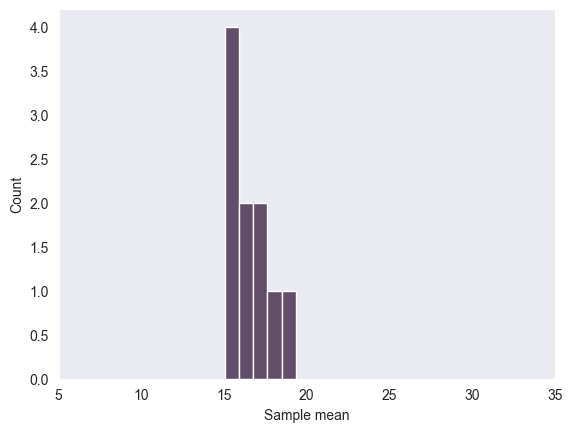

In [189]:
def delay_simulation(num_delay, num_rep):
    data = []
    for i in range(1, num_rep + 1):
        flights['delay sampled'] = flights['delay'].sample(n = num_delay, replace = True).reset_index(drop = True)
        sample_mean = flights['delay sampled'].mean()
        data.append({
            'Simulation': i,
            'Sample mean': sample_mean
        })
    datadf = pd.DataFrame(data)
    return datadf

num_delay = int(input("Enter the number of delays (sample size):"))
num_rep = int(input("Enter the number of simulations:"))
sim_results = delay_simulation(num_delay, num_rep)
display(sim_results.head())

plt.xlim(5, 35)
sns.histplot(sim_results, x = 'Sample mean')

You can also see that the histograms get narrower, and hence taller, as the sample size increases. We have seen that before, but now we will pay closer attention to the measure of spread.

In [197]:
pp_std = flights['delay'].std()
pp_std

39.48162778440366

Now look at the SD of all 10,000 sample means, when the sample size is 100. That SD is about one-tenth of the population SD. When the sample size is 400, the SD of all the sample means is about one-twentieth of the population SD. When the sample size is 625, the SD of the sample means is about one-twentyfifth of the population SD.

,Simulation,Sample mean
0,1,17.85
1,2,19.26
2,3,21.20
3,4,19.17
4,5,19.85


3.9920714590583697


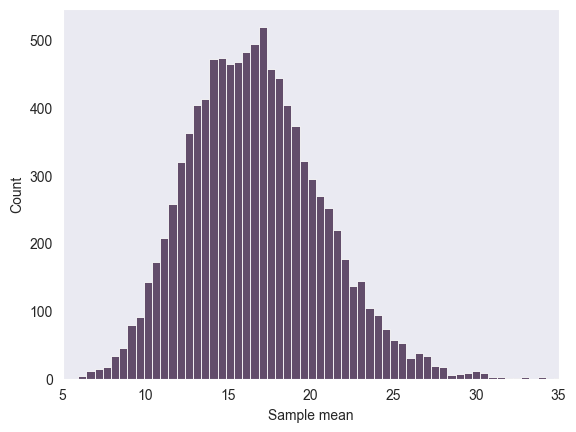

In [193]:
sim_results100 = delay_simulation(100, 10000)
display(sim_results100.head())

plt.xlim(5, 35)
sns.histplot(sim_results100, x = 'Sample mean')

print(sim_results100['Sample mean'].std())

,Simulation,Sample mean
0,1,15.2500
1,2,14.5350
2,3,14.5150
3,4,15.0950
4,5,14.9075


1.9564899353322664


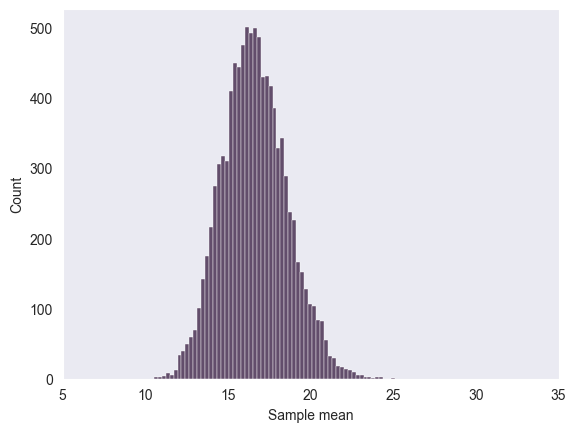

In [194]:
sim_results400 = delay_simulation(400, 10000)
display(sim_results400.head())

plt.xlim(5, 35)
sns.histplot(sim_results400, x = 'Sample mean')

print(sim_results400['Sample mean'].std())

,Simulation,Sample mean
0,1,15.5088
1,2,14.4816
2,3,17.4976
3,4,19.7536
4,5,17.9696


1.5815094138892518


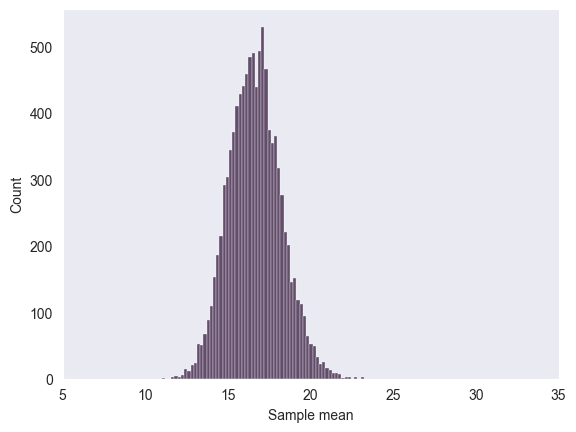

In [195]:
sim_results625 = delay_simulation(625, 10000)
display(sim_results625.head())

plt.xlim(5, 35)
sns.histplot(sim_results625, x = 'Sample mean')

print(sim_results625['Sample mean'].std())

**The Square Root Law**

From the table of SD comparisons, you can see that the SD of the means of random samples of 25 flight delays is about 8 minutes. If you multiply the sample size by 4, you’ll get samples of size 100. The SD of the means of all of those samples is about 4 minutes. That’s smaller than 8 minutes, but it’s not 4 times as small; it’s only 2 times as small. That’s because the sample size in the denominator has a square root over it. The sample size increased by a factor of 4, but the SD went down by a factor of 2.

In general, when you multiply the sample size by a factor, the accuracy of the sample mean goes up by the square root of that factor.

So to increase accuracy by a factor of 10, you have to multiply sample size by a factor of 100. Accuracy doesn’t come cheap!

Let's write a function that compares the SD from the estimation formula SD = pp SD / root of n AND the empirical SD from random sampling.

**Task**

Create a table, with columns:
1. sample size n (range(25, 800, 25))
2. SD of 10000 sample means
3. ppSD/sqrt(n)

In [220]:
sample_sizes = np.arange(25, 300, 25)

sd_means = np.array([])
for n in sample_sizes:
    means = np.array([])
    for i in np.arange(10000):
        means = np.append(means, np.mean(delay_simulation(n, 1)))
    sd_means = np.append(sd_means, np.std(means))
pp_std_sqrt_n = pp_std / np.sqrt(sample_sizes)

sd_comparison = pd.DataFrame({
    'Sample Size n': sample_sizes,
    'SD of 10,000 Sample Means': sd_means,
    'pp_std/sqrt(n)': pp_std_sqrt_n
})

sd_comparison

,Sample Size n,"SD of 10,000 Sample Means",pp_std/sqrt(n)
0,25,3.936475,7.896326
1,50,2.792536,5.583545
2,75,2.297511,4.558946
3,100,2.008620,3.948163
4,125,1.757923,3.531344
5,150,1.620484,3.223661
6,175,1.489034,2.984531
7,200,1.397154,2.791773
8,225,1.311251,2.632109
9,250,1.245233,2.497037


It takes literally 30s for 3 rows -> it would take over 4 minutes to print from 25 to 625 and plot. For now just know that the SD from the sampling and the square root law would be pretty close.

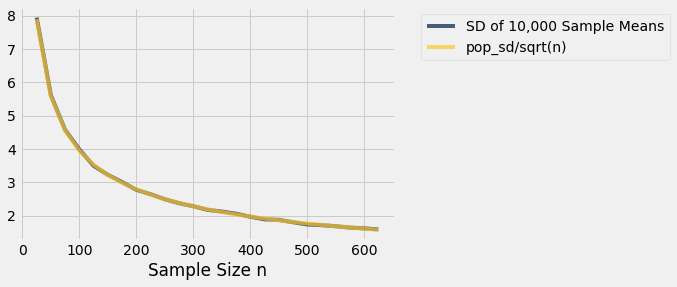